In [21]:
%reset -f
%load_ext autoreload
%autoreload 2

import os
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import figurefirst as fifi
import figure_functions as ff

from drone_model import DroneSimulator

from pybounds import SlidingEmpiricalObservabilityMatrix, SlidingFisherObservability, ObservabilityMatrixImage, colorline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
dt = 0.1
fs = 1 / dt

In [23]:
simulator = DroneSimulator(dt=dt)

In [24]:
# Define the set-point(s) to follow
tsim_takeoff = np.arange(0, 1.0 + dt/2, step=dt)
tsim = np.arange(0, 5.0 + dt/2, step=dt)
tsim_set = np.hstack([tsim_takeoff, tsim])
tsim.shape

(51,)

In [25]:
# Make a turn
psi = (np.pi/4) * np.ones_like(tsim)
psi[30:] = psi[30] + np.pi/2
g = 2.0 * np.ones_like(tsim)
# g[40:] = g[40:] + 1.0
vx = g * np.cos(psi)
vy = g * np.sin(psi)
psi.shape

(51,)

In [26]:
target_z = 2.0
k = 5
psi_takeoff = psi[0] * np.ones_like(tsim_takeoff)
z_takeoff = 0.01 + target_z * (1 - np.exp(-k * tsim_takeoff))
vx_takeoff = 0.1 * np.cos(psi_takeoff) * np.ones_like(tsim_takeoff) + 0.001
vy_takeoff = 0.1 * np.sin(psi_takeoff) * np.ones_like(tsim_takeoff) + 0.001

In [27]:
z = target_z * np.ones_like(tsim)

In [28]:
vx_set = np.hstack([vx_takeoff, vx])
vy_set = np.hstack([vy_takeoff, vy])
psi_set = np.hstack([psi_takeoff, psi])
z_set = np.hstack([z_takeoff, z])

In [29]:
w_set = 1.0 * np.ones_like(tsim_set)
zeta_set = np.pi * np.ones_like(tsim_set)

# Set-points

In [30]:
simulator.update_setpoint(vx=vx_set, vy=vy_set, psi=psi_set, z=z_set, w=w_set, zeta=zeta_set)

In [31]:
st = time.time()
t_sim, x_sim, u_sim, y_sim = simulator.simulate(x0=None, mpc=True, return_full_output=True)
et = time.time()
print('elapsed time:', et-st)

elapsed time: 7.898695945739746


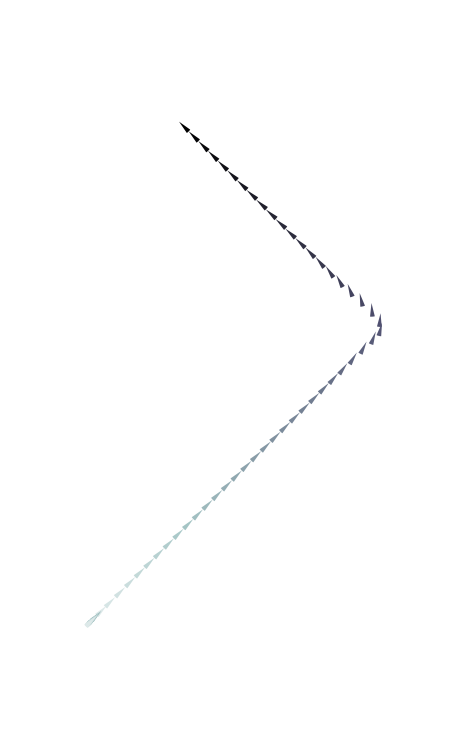

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(3 * 1, 3 * 1), sharex=True, sharey=True, dpi=300)

x = x_sim['x']
y = x_sim['y']
heading = x_sim['psi']

ff.plot_trajectory(x, y, heading,
                   color=tsim_set,
                   ax=ax,
                   size_radius=0.2,
                   nskip=0)

fifi.mpl_functions.adjust_spines(ax, [])

In [33]:
pd.DataFrame(y_sim)

,x,y,z,phi,theta,psi,Psi,phi_dot,theta_dot,psi_dot,...,zeta,m,Ix,Iy,Iz,Jr,b,d,Dl,Dr
0,0.000000,0.000000,0.010000,0.000000,0.000000,0.785398,0.785398,0.000000,0.000000,0.000000e+00,...,3.141593,2.873,0.039081,0.039081,0.046183,0.03198,1.8311,0.01,0.1,0.1
1,0.007315,0.007160,0.061781,-0.000784,-0.000672,0.785398,0.785399,-0.015045,-0.012888,4.149355e-07,...,3.141593,2.873,0.039081,0.039081,0.046183,0.03198,1.8311,0.01,0.1,0.1
2,0.014738,0.014375,0.265479,-0.001313,0.002107,0.785400,0.785397,0.003665,0.065138,2.909861e-05,...,3.141593,2.873,0.039081,0.039081,0.046183,0.03198,1.8311,0.01,0.1,0.1
3,0.022490,0.022033,0.615262,-0.002129,-0.000678,0.785415,0.785416,-0.019008,-0.113239,2.645654e-04,...,3.141593,2.873,0.039081,0.039081,0.046183,0.03198,1.8311,0.01,0.1,0.1
4,0.030183,0.029694,1.006274,-0.004828,-0.039287,0.785444,0.785633,-0.034341,-0.636650,3.088509e-04,...,3.141593,2.873,0.039081,0.039081,0.046183,0.03198,1.8311,0.01,0.1,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1.994534,6.652281,2.003144,-0.002221,0.009879,2.368452,2.368430,-0.005559,-0.000204,-9.301411e-02,...,3.141593,2.873,0.039081,0.039081,0.046183,0.03198,1.8311,0.01,0.1,0.1
58,1.853129,6.793713,2.003519,-0.002603,0.009784,2.360176,2.360151,-0.002226,-0.001622,-7.322024e-02,...,3.141593,2.873,0.039081,0.039081,0.046183,0.03198,1.8311,0.01,0.1,0.1
59,1.711713,6.935145,2.002937,-0.002678,0.009638,2.353967,2.353942,0.000613,-0.001315,-5.172934e-02,...,3.141593,2.873,0.039081,0.039081,0.046183,0.03198,1.8311,0.01,0.1,0.1
60,1.570287,7.076567,2.001933,-0.002599,0.009553,2.349852,2.349827,0.000952,-0.000436,-3.131873e-02,...,3.141593,2.873,0.039081,0.039081,0.046183,0.03198,1.8311,0.01,0.1,0.1


In [34]:
# simulator.plot(name='setpoint')

# Observability

## Construct observability matrix in sliding windows

In [35]:
w = 4  # window size, set to None to use entire time-series as one window

In [36]:
# Construct O in sliding windows
st = time.time()
SEOM = SlidingEmpiricalObservabilityMatrix(simulator, t_sim, x_sim, u_sim, w=w, eps=1e-4)
et = time.time()
print('elapsed time:', et-st)

elapsed time: 18.33744764328003


In [37]:
# Get O's
O_sliding = SEOM.get_observability_matrix()

In [38]:
n_window = len(O_sliding)
print(n_window, 'windows')

59 windows


## Compute Fisher information matrix & inverse for each sliding window

In [39]:
# Set each sensor noise level
# sensor_noise = {'phi':0.1, 'psi': 0.1, 'theta': 0.1, 'gamma': 0.1, 'beta': 0.1, 'r': 0.1}

In [40]:
# Choose sensors to use from O
o_sensors = ['phi', 'theta', 'psi', 'gamma', 'beta']

# Chose states to use from O
# o_states = None
o_states =  ['x',  # x position [m]
               'v_x',  # x velocity [m/s]
               'y',  # y position [m]
               'v_y',  # y velocity [m/s]
               'z',  # z position (altitude) [m]
               'v_z',  # z velocity [m/s]
               'phi',  # roll [rad]
               'phi_dot',  # roll rate [rad/s]
               'theta',  # roll [rad]
               'theta_dot',  # roll rate [rad/s]
               'psi',  # roll [rad]
               'psi_dot',  # roll rate [rad/s]
               'w',  # wind magnitude [m/s]
               'zeta',  # wind direction [rad]
               # 'w_dot',  # wind magnitude [m/s]
               # 'zeta_dot',  # wind direction [rad]
               'w_z',  # wind z velocity [m/s]
               'm',  # mass
               'Ix',  #
               'Iy',  #
               'Iz',  #
               'Jr',  #
               'b',  #
               'd',  #
               'Dl',  #
               'Dr',  #
               ]

# Choose time-steps to use from O
window_size = 4
o_time_steps = np.arange(0, window_size, step=1)

In [41]:
# Compute the Fisher information & inverse for each window and store the minimum error variance
SFO = SlidingFisherObservability(SEOM.O_df_sliding, time=SEOM.t_sim, lam=1e-6, R=0.1, sensor_noise_dict=None,
                                 states=o_states, sensors=o_sensors, time_steps=o_time_steps, w=window_size)

In [42]:
SFO.FO[-1].O

,,x,v_x,y,v_y,z,v_z,phi,phi_dot,theta,theta_dot,...,w_z,m,Ix,Iy,Iz,Jr,b,d,Dl,Dr
sensor,time_step,,,,,,,,,,,,,,,,,,,,,
beta,0,0.000000e+00,-3.535836e-01,0.000000e+00,-3.535217e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
gamma,0,0.000000e+00,-1.806724e-01,0.000000e+00,-3.083841e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
phi,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
psi,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
theta,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
beta,1,4.125589e-09,-3.523231e-01,1.998401e-10,-3.523116e-01,-2.220446e-12,-3.108624e-10,-4.864917e-01,-2.238877e-02,3.467097e-04,-7.052876e-05,...,-1.110223e-10,-2.473729e-05,5.882916e-04,-1.830558e-06,-0.000034,2.838623e-06,6.985619e-04,5.977295e-05,-1.228336e-02,-0.000017
gamma,1,3.028688e-09,-1.800259e-01,1.465494e-10,-3.073127e-01,0.000000e+00,-2.264855e-10,-3.365303e-01,-1.547179e-02,-8.764255e-02,-4.093201e-03,...,-7.993606e-11,-1.589737e-05,4.069106e-04,1.048573e-05,-0.000026,1.476710e-06,1.730158e-05,4.432932e-05,8.397882e-07,-0.000017
phi,1,2.301785e-09,4.643926e-09,1.129695e-10,-6.225077e-10,1.084202e-14,-1.731644e-10,1.000000e+00,8.822973e-02,-2.162571e-10,3.790250e-04,...,-6.189710e-11,-6.031386e-09,-3.476179e-03,1.056635e-05,-0.000012,-1.683256e-05,6.682918e-05,2.708521e-07,-5.458524e-11,0.000142
psi,1,1.220579e-08,2.461586e-08,6.017409e-10,-3.297362e-09,6.661338e-12,-9.237056e-10,5.084821e-10,1.182388e-08,-1.143530e-09,1.116884e-09,...,-3.241851e-10,-3.198553e-08,1.920042e-07,-1.882272e-07,-0.022429,1.554312e-11,5.011769e-08,3.748320e-02,-2.953193e-10,0.006610


In [43]:
# np.round(SFO.FO[-1].O, 4)

In [44]:
# Pull out minimum error variance, 'time' column is the time vector shifted forward by w/2 and 'time_initial' is the original time
EV_aligned = SFO.get_minimum_error_variance()

In [45]:
EV_aligned

,time,time_initial,x,v_x,y,v_y,z,v_z,phi,phi_dot,...,w_z,m,Ix,Iy,Iz,Jr,b,d,Dl,Dr
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.2,0.0,1000000.000000,1653.312175,1000000.000000,1653.234319,1.000000e+06,999999.997568,0.063194,14.912746,...,1000000.000000,913810.055327,688.844836,389.333742,966893.780364,999971.841090,787986.405655,139145.183160,1280.532350,7578.835617
3,0.3,0.1,999999.999997,5316.784116,999999.999999,4935.498223,1.000000e+06,999999.996560,0.065455,8.319183,...,1000000.000000,913456.316102,418.014553,367.465158,969478.173771,997313.724037,787155.812390,61599.009018,1616.186346,6359.460598
4,0.4,0.2,999999.999997,9679.820782,999999.999999,9400.026010,1.000000e+06,999999.999851,0.052400,60.920567,...,1000000.000000,913565.142293,455.915261,359.721692,972964.399612,973825.646212,787265.676047,73829.645318,1516.732389,2406.401590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,5.7,5.5,999999.997135,441033.960118,999999.999978,440463.136723,1.000000e+06,999999.999658,0.098573,187.285538,...,999999.999969,945955.341138,3408.003284,5329.089249,46723.034877,999532.025639,863949.904592,2256.158297,3718.314566,216097.930467
58,5.8,5.6,999999.999595,448713.857098,999999.999999,448605.605452,1.000000e+06,999999.999988,0.092578,85.514093,...,999999.999999,970311.543390,12834.359182,10867.465509,76703.045977,998639.577470,917838.995630,3954.592693,4698.135077,359257.522002
59,5.9,5.7,999999.999611,466490.223971,999999.999999,466666.207418,1.000000e+06,999999.999997,0.095635,52.193526,...,999999.999999,995070.171910,4071.049863,196908.266404,91672.486384,999138.997808,982158.130950,5045.301150,5649.008521,420608.524949
60,6.0,5.8,999999.999807,466359.551855,1000000.000000,466492.895627,1.000000e+06,999999.999999,0.097441,133.449098,...,1000000.000000,994768.488533,29788.396400,46984.677226,164244.788081,998452.300163,983163.816823,8745.215130,5628.696958,735785.488550


# Plot error variance as color on state time-series

In [46]:
EV_no_nan = EV_aligned.fillna(method='bfill').fillna(method='ffill')
startI = 20
endI = 100
EV_no_nan = EV_no_nan.iloc[startI:endI, :]
EV_no_nan

,time,time_initial,x,v_x,y,v_y,z,v_z,phi,phi_dot,...,w_z,m,Ix,Iy,Iz,Jr,b,d,Dl,Dr
20,2.0,1.8,1.000000e+06,308265.076630,1.000000e+06,308249.749868,1000000.0,999999.999999,0.090540,39.717242,...,1000000.000000,896347.465884,158836.575955,342.519786,988644.516894,999953.047307,744917.488562,491526.042264,1314.219038,6987.003492
21,2.1,1.9,1.000000e+06,308884.127204,1.000000e+06,308870.938537,1000000.0,1000000.000000,0.084283,45.073005,...,1000000.000000,897307.068619,610278.962202,417.727971,948104.538985,999989.856505,747074.078442,890627.607362,1386.409220,3316.272962
22,2.2,2.0,1.000000e+06,320996.134346,1.000000e+06,320991.202560,1000000.0,1000000.000000,0.068691,3.918395,...,1000000.000000,911010.467226,961197.827296,524.695393,921468.322836,999999.585879,779780.276239,961879.192357,2670.148911,29058.809480
23,2.3,2.1,1.000000e+06,321992.342593,1.000000e+06,321997.387383,1000000.0,1000000.000000,0.072771,5.941002,...,1000000.000000,912372.559388,977972.871529,432.007241,931819.687380,999998.025407,783514.210557,794717.619538,2976.547881,62389.638289
24,2.4,2.2,1.000000e+06,336593.805184,1.000000e+06,336600.789546,1000000.0,1000000.000000,0.072795,3.757322,...,1000000.000000,927628.126766,967540.009806,1897.327089,949756.700788,999994.839501,819887.428878,675825.685774,4299.013673,23083.265306
25,2.5,2.3,1.000000e+06,381841.992247,1.000000e+06,381847.468520,1000000.0,1000000.000000,0.067868,5.254420,...,1000000.000000,975208.502212,955954.423856,1657.236113,965472.116678,999998.862008,933366.513272,634043.839771,8149.265109,358709.187449
26,2.6,2.4,1.000000e+06,378738.094185,1.000000e+06,378736.568353,1000000.0,1000000.000000,0.068852,4.208948,...,1000000.000000,971904.598147,996040.696569,2488.738547,978191.510459,999999.796805,927299.259912,650079.370487,7773.685476,430682.364004
27,2.7,2.5,1.000000e+06,395666.682957,1.000000e+06,395664.033302,1000000.0,1000000.000000,0.067572,3.746146,...,1000000.000000,989841.342979,989657.653521,17667.666273,988112.447174,999999.698759,969292.557084,708600.068820,9499.995422,455285.617274
28,2.8,2.6,1.000000e+06,403071.802758,1.000000e+06,403071.759853,1000000.0,1000000.000000,0.067040,4.109110,...,1000000.000000,997694.884850,984983.232567,5293.521811,995069.840318,999999.975470,990511.685866,793339.357981,10387.049653,908875.486621
29,2.9,2.7,1.000000e+06,402956.630549,1.000000e+06,402958.374576,1000000.0,1000000.000000,0.067029,3.943158,...,1000000.000000,997572.104805,994091.272388,44727.752589,998872.204980,999999.994895,989972.557323,881662.499087,10381.398989,860519.335291


In [47]:
min_ev = np.min(EV_no_nan.iloc[:, 2:].values)
max_ev = np.max(EV_no_nan.iloc[:, 2:].values)

log_tick_high = int(np.ceil(np.log10(max_ev)))
log_tick_low = int(np.floor(np.log10(min_ev)))

# log_tick_low = -3
# log_tick_high = 6

cnorm = mpl.colors.LogNorm(10**log_tick_low, 10**log_tick_high)


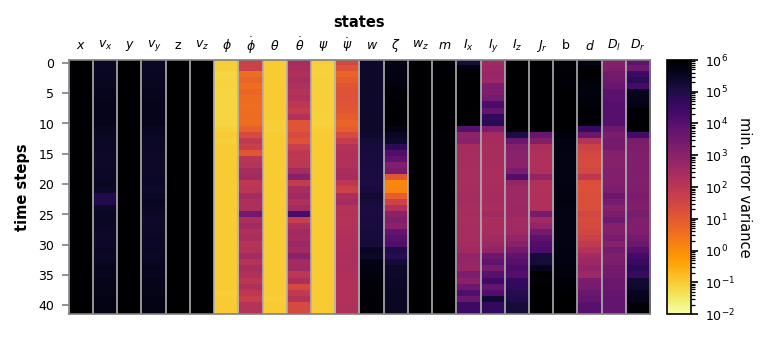

In [48]:
cmap = 'inferno_r'

if o_states is None:
    state_labels = simulator.state_names
else:
    state_labels = o_states

fig, ax = plt.subplots(1, 1, figsize=(5 * 1, 4 * 1), dpi=150)
ax.imshow(EV_no_nan.iloc[:, 2:], norm=cnorm, aspect=0.25, cmap=cmap, interpolation='none')
ax.set_xticks(np.arange(0, len(state_labels)) - 0.5)
ax.grid(True, axis='x')
ax.tick_params(axis='both', which='both', labelsize=6, top=False, labeltop=True, bottom=False, labelbottom=False, color='gray')

# Convert to Latex
LatexConverter = ff.LatexStates()
state_names_latex = LatexConverter.convert_to_latex(state_labels)
ax.set_xticklabels(state_names_latex)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0, ha='right', va='bottom')

ax.set_ylabel('time steps', fontsize=7, fontweight='bold')
ax.set_xlabel('states', fontsize=7, fontweight='bold')
ax.xaxis.set_label_position('top')

# Colorbar
cax = ax.inset_axes([1.03, 0.0, 0.04, 1.0])
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=cnorm, cmap=cmap), cax=cax,
                    ticks=np.logspace(log_tick_low, log_tick_high, log_tick_high-log_tick_low + 1))
cbar.set_label('min. error variance', rotation=270, fontsize=7, labelpad=8)
cbar.ax.tick_params(labelsize=6)

import matplotlib.transforms as transforms
xticks = ax.get_xticklabels()
for tick in xticks:
    tick.set_ha('center')  # Align to the right
    tick.set_va('center')
    tick.set_rotation(0)  # Optional: ensure they aren't rotated
    tick.set_transform(tick.get_transform() + transforms.ScaledTranslation(6/72, 0, ax.figure.dpi_scale_trans))

ax.spines[['bottom', 'top', 'left', 'right']].set_color('gray')  # X-axis

In [49]:
EV_no_nan

,time,time_initial,x,v_x,y,v_y,z,v_z,phi,phi_dot,...,w_z,m,Ix,Iy,Iz,Jr,b,d,Dl,Dr
20,2.0,1.8,1.000000e+06,308265.076630,1.000000e+06,308249.749868,1000000.0,999999.999999,0.090540,39.717242,...,1000000.000000,896347.465884,158836.575955,342.519786,988644.516894,999953.047307,744917.488562,491526.042264,1314.219038,6987.003492
21,2.1,1.9,1.000000e+06,308884.127204,1.000000e+06,308870.938537,1000000.0,1000000.000000,0.084283,45.073005,...,1000000.000000,897307.068619,610278.962202,417.727971,948104.538985,999989.856505,747074.078442,890627.607362,1386.409220,3316.272962
22,2.2,2.0,1.000000e+06,320996.134346,1.000000e+06,320991.202560,1000000.0,1000000.000000,0.068691,3.918395,...,1000000.000000,911010.467226,961197.827296,524.695393,921468.322836,999999.585879,779780.276239,961879.192357,2670.148911,29058.809480
23,2.3,2.1,1.000000e+06,321992.342593,1.000000e+06,321997.387383,1000000.0,1000000.000000,0.072771,5.941002,...,1000000.000000,912372.559388,977972.871529,432.007241,931819.687380,999998.025407,783514.210557,794717.619538,2976.547881,62389.638289
24,2.4,2.2,1.000000e+06,336593.805184,1.000000e+06,336600.789546,1000000.0,1000000.000000,0.072795,3.757322,...,1000000.000000,927628.126766,967540.009806,1897.327089,949756.700788,999994.839501,819887.428878,675825.685774,4299.013673,23083.265306
25,2.5,2.3,1.000000e+06,381841.992247,1.000000e+06,381847.468520,1000000.0,1000000.000000,0.067868,5.254420,...,1000000.000000,975208.502212,955954.423856,1657.236113,965472.116678,999998.862008,933366.513272,634043.839771,8149.265109,358709.187449
26,2.6,2.4,1.000000e+06,378738.094185,1.000000e+06,378736.568353,1000000.0,1000000.000000,0.068852,4.208948,...,1000000.000000,971904.598147,996040.696569,2488.738547,978191.510459,999999.796805,927299.259912,650079.370487,7773.685476,430682.364004
27,2.7,2.5,1.000000e+06,395666.682957,1.000000e+06,395664.033302,1000000.0,1000000.000000,0.067572,3.746146,...,1000000.000000,989841.342979,989657.653521,17667.666273,988112.447174,999999.698759,969292.557084,708600.068820,9499.995422,455285.617274
28,2.8,2.6,1.000000e+06,403071.802758,1.000000e+06,403071.759853,1000000.0,1000000.000000,0.067040,4.109110,...,1000000.000000,997694.884850,984983.232567,5293.521811,995069.840318,999999.975470,990511.685866,793339.357981,10387.049653,908875.486621
29,2.9,2.7,1.000000e+06,402956.630549,1.000000e+06,402958.374576,1000000.0,1000000.000000,0.067029,3.943158,...,1000000.000000,997572.104805,994091.272388,44727.752589,998872.204980,999999.994895,989972.557323,881662.499087,10381.398989,860519.335291


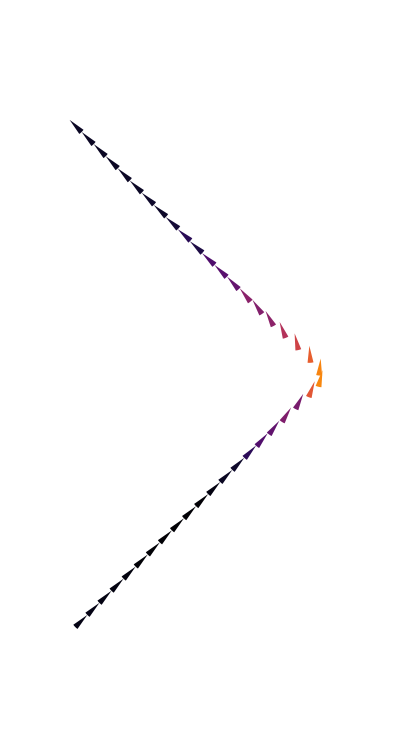

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(3 * 1, 3 * 1), sharex=True, sharey=True, dpi=300)

x = x_sim['x'][startI:endI]
y = x_sim['y'][startI:endI]
heading = x_sim['psi'][startI:endI]
color = EV_no_nan['zeta'].values

# cnorm = mpl.colors.LogNorm(1e-2, 1e6)

ff.plot_trajectory(x, y, heading,
                   color=color,
                   ax=ax,
                   size_radius=0.2,
                   nskip=0,
                   colormap=cmap,
                   colornorm=cnorm)

fifi.mpl_functions.adjust_spines(ax, [])

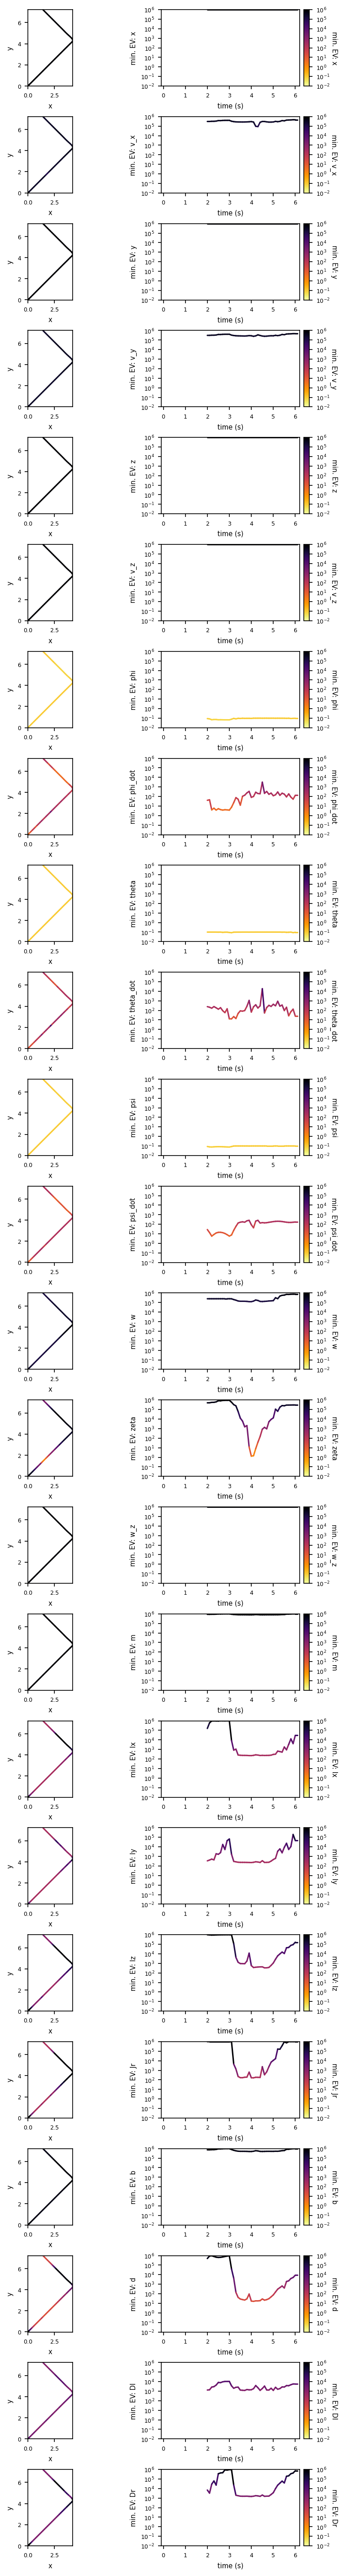

In [51]:
states = list(SFO.FO[0].O.columns)
n_state = len(states)

fig, ax = plt.subplots(n_state, 2, figsize=(6, n_state * 2), dpi=150)
ax = np.atleast_2d(ax)

cmap = 'inferno_r'

for n, state_name in enumerate(states):
    # colorline(t_sim, x_sim[state_name], EV_no_nan[state_name].values, ax=ax[n, 0], cmap=cmap, norm=cnorm)
    colorline(x_sim['x'], x_sim['y'], EV_no_nan[state_name].values, ax=ax[n, 0], cmap=cmap, norm=cnorm)
    colorline(EV_no_nan['time'], EV_no_nan[state_name].values, EV_no_nan[state_name].values, ax=ax[n, 1], cmap=cmap, norm=cnorm)

    # Colorbar
    cax = ax[n, -1].inset_axes([1.03, 0.0, 0.04, 1.0])
    cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=cnorm, cmap=cmap), cax=cax,
                        ticks=np.logspace(log_tick_low, log_tick_high, log_tick_high - log_tick_low + 1))
    cbar.set_label('min. EV: ' + state_name, rotation=270, fontsize=7, labelpad=8)
    cbar.ax.tick_params(labelsize=6)

    ax[n, 0].set_ylim(np.min(x_sim['y']) - 0.01, np.max(x_sim['y']) + 0.01)
    ax[n, 0].set_xlim(np.min(x_sim['x']) - 0.01, np.max(x_sim['x']) + 0.01)
    ax[n, 0].set_ylabel('y', fontsize=7)
    ax[n, 0].set_xlabel('x', fontsize=7)
    ax[n, 0].set_aspect(1.0)

    ax[n, 1].set_ylim(10 ** log_tick_low, 10 ** log_tick_high)
    ax[n, 1].set_yscale('log')
    ax[n, 1].set_ylabel('min. EV: ' + state_name, fontsize=7)
    ax[n, 1].set_yticks(np.logspace(log_tick_low, log_tick_high, log_tick_high - log_tick_low + 1))

for a in ax.flat:
    a.tick_params(axis='both', labelsize=6)

for a in ax[:, 1]:
    a.set_xlabel('time (s)', fontsize=7)
    a.set_xlim(-0.1, t_sim[-1] + 0.1)

# for a in ax[:, 1]:
#     a.set_xlim(-0.1, t_sim[-1] + 0.1)

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)

plt.show()